# Credit Risk Transition Modeling Using Markov Chains

---



## Project Introduction

### Project Overview

- This project analyzes credit card clients' repayment behavior using a Markov Chain model.
The dataset contains monthly records of customers' payment statuses, credit limits, bills, and demographic information. Our main focus is on the repayment status variables (PAY_0 to PAY_6), which capture the client's delay in payment month-by-month. These values allow us to track how customers move between different risk levels over time.

- Understanding how clients transition from one risk state to another is crucial for financial institutions. It helps banks estimate the probability that a customer will improve, remain stable, or fall into higher-risk categories, leading to potential default. By modeling these transitions, we can build a **Transition Matrix** that reflects real customer behavior and supports better credit-risk decision making.

- In this project, we preprocess the data, convert each customer's payment history into risk states, and analyze their transitions using a Markov Chain approach. This enables us to identify high-risk patterns, predict future behavior, and compare our findings with the “default payment next month” outcome for validation.

### Dataset Column Description



*   **ID**: ID of each client
*   **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
*   **SEX**: Gender (1 = male; 2 = female)
*   **EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5 = unknown; 6 = unknown)
*   **MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others)
*   **AGE**: Age in years
*   **PAY_0** - **PAY_6**: Repayment status from September 2005 to April 2005.
    *   `PAY_0` = the repayment status in September, 2005
    *   `PAY_1` = the repayment status in August, 2005
    *   ...
    *   `PAY_6` = the repayment status in April, 2005
    
    Repayment status description:
    *   -2 = no consumption
    *   -1 = pay duly
    *   0 = pay on time
    *   1 = payment delay for one month
    *   2 = payment delay for two months
    *   ...
    *   9 = payment delay for nine months and above
*   **BILL_AMT1** - **BILL_AMT6**: Amount of bill statement from September 2005 to April 2005.
    *   `BILL_AMT1` = amount of bill statement in September, 2005
    *   `BILL_AMT2` = amount of bill statement in August, 2005
    *   ...
    *   `BILL_AMT6` = amount of bill statement in April, 2005
*   **PAY_AMT1** - **PAY_AMT6**: Amount of previous payment from September 2005 to April 2005.
    *   `PAY_AMT1` = amount paid in September, 2005
    *   `PAY_AMT2` = amount paid in August, 2005
    *   ...
    *   `PAY_AMT6` = amount paid in April, 2005
*   **default payment next month**: Default payment (1=yes, 0=no) for the next month.

## Data Cleaning & Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/UCI_Credit_Card.csv')
df = pd.DataFrame(data)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Checking Nulls
df.isna().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
# Duplications Check
df.duplicated().sum()

np.int64(0)

**Handling the Negative values**

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
# Checking the values in each column

for col in df.columns:
    print(f"\n{col} unique values:", df[col].unique())


ID unique values: [    1     2     3 ... 29998 29999 30000]

LIMIT_BAL unique values: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]

SEX unique values: [2 1]

EDUCATION unique values: [2 1 3 5 4 6 0]

MARRIAGE unique values: [1 2 3 0]

AGE unique values: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 

In [ ]:
df[df<0].count()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,8445
PAY_2,9832
PAY_3,10023
PAY_4,10035


In [ ]:
for bill in df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]:
  df[bill]=df[bill].clip(lower=0)

In [ ]:
df[df < 0].count()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,8445
PAY_2,9832
PAY_3,10023
PAY_4,10035


**Data Frame suitable for Visualization**

In [ ]:
# Converting numbers to labels for visualization
df_visuals = df.copy()

df_visuals['SEX'] = df_visuals['SEX'].replace({1:'Male', 2:'Female'})
df_visuals['EDUCATION'] = df_visuals['EDUCATION'].replace({1:'Graduate', 2:'University', 3:'High School', 4:'Others', 5:'Unknown', 6:'Unknown', 0:'Unknown'})
df_visuals['MARRIAGE'] = df_visuals['MARRIAGE'].replace({1:'Married', 2:'Single', 3:'Others', 0:'Others'})

df_visuals

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,Male,High School,Married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,Male,High School,Single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,Male,University,Single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,Male,High School,Married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


**Important features for the Markov Model**

In [ ]:
# The required columns for the Markov Model
markov_df=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
markov_df

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1



## Feature Engineering / Risk State Creation

Step 1: Chronological Ordering

The original dataset lists columns in reverse chronological order (PAY_0 is Sept, PAY_6 is April).

We need to reorder them from oldest (April) to newest (September) to track transitions correctly.

In [ ]:
chronological_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0']
df_states = df[chronological_cols].copy()

Rename columns to generic time steps (Month_1 to Month_6) for clarity

In [ ]:
df_states.columns = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']



---


Step 2: Define Risk State Mapping Logic


    Maps raw payment status to simplified Risk States.
    State 0: LOW / Current/Good Standing (includes -2, -1, 0)
    State 1: MEDIUM / Late by 1 or 2 Months
    State 2: HIGH / Late by 3 or 4 Months
    State 3: Default / Late by 5 Months or more


In [ ]:
def get_risk_state(val):
    if val <= 0:
        return 0  # Low Risk
    elif val in [1,2]:
        return 1  # Medium Risk
    elif val in [3,4]:
        return 2  # High Risk
    else:
        return 3  # Default



---


Step 3: Apply Transformation

Apply the mapping function to the entire dataframe

In [ ]:
risk_states = df_states.applymap(get_risk_state)

/tmp/ipython-input-3052962656.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  risk_states = df_states.applymap(get_risk_state)




---


Step 4: Verification

Display the first few rows to ensure the transformation worked as expected

In [ ]:
print("Transformed Risk States (Chronological Order):")
print(risk_states.head())

Transformed Risk States (Chronological Order):
   Month_1  Month_2  Month_3  Month_4  Month_5  Month_6
0        0        0        0        0        1        1
1        1        0        0        0        1        0
2        0        0        0        0        0        0
3        0        0        0        0        0        0
4        0        0        0        0        0        0


In [ ]:
print("\nState Distribution in the Final Month (Month_6):")
print(risk_states['Month_6'].value_counts().sort_index())


State Distribution in the Final Month (Month_6):
Month_6
0    23182
1     6355
2      398
3       65
Name: count, dtype: int64


## State Encoding

In [ ]:
state_map = {
    0: 'Low Risk',
    1: 'Medium Risk',
    2: 'High Risk',
    3: 'Default'
}

risk_states = risk_states.astype(int)

unique_vals = sorted(risk_states.values.ravel())
print(f" Data Validation: Found states {unique_vals}")

if not set(unique_vals).issubset(set(state_map.keys())):
    print("CRITICAL WARNING: Unknown states found in data!")

 Data Validation: Found states [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int

In [ ]:
def color_risk_states(val):
    """
    Returns CSS styling based on the risk value.
    """
    if val == 0: # Low Risk
        return 'background-color: #d4edda; color: #155724; border: 1px solid white;' # Light Green
    elif val == 1: # Medium Risk
        return 'background-color: #fff3cd; color: #856404; border: 1px solid white;' # Light Yellow
    elif val == 2: # High Risk
        return 'background-color: #ffe5d0; color: #d65b00; border: 1px solid white;' # Orange
    elif val == 3: # Default
        return 'background-color: #f8d7da; color: #721c24; font-weight: bold; border: 1px solid white;' # Red
    return ''

In [ ]:
styled_view = risk_states.head(20).style\
    .map(color_risk_states)\
    .set_caption("Client Risk State Transitions (Color Coded)")\
    .format(precision=0)
styled_view

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,0,0,0,0,1,1
1,1,0,0,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,1,0,0
9,0,0,0,0,0,0


## Visualizations:

In [ ]:
df_visuals = df_visuals.sort_values(by='LIMIT_BAL', ascending=False)

In [ ]:
df_visuals.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2197,2198,1000000.0,Female,Graduate,Married,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
14919,14920,800000.0,Male,University,Married,53,-1,-1,-1,0,...,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0,0
18006,18007,800000.0,Male,Graduate,Single,46,-2,-2,-2,-1,...,6193.0,1957.0,3175.0,4644.0,3832.0,6219.0,1961.0,3183.0,27201.0,0
24320,24321,780000.0,Male,Graduate,Married,48,0,0,0,0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
28715,28716,780000.0,Female,University,Single,41,-2,-2,-2,-2,...,21482.0,72628.0,182792.0,62819.0,39558.0,22204.0,82097.0,184322.0,25695.0,0
21375,21376,760000.0,Male,High School,Married,54,0,0,0,0,...,469931.0,474421.0,480598.0,20011.0,19500.0,19019.0,18003.0,20000.0,22000.0,0
10089,10090,750000.0,Female,Graduate,Married,41,0,0,0,0,...,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0,0
3733,3734,750000.0,Female,University,Married,43,-1,-1,-1,-2,...,63749.0,85067.0,83208.0,99664.0,74640.0,63758.0,85072.0,83215.0,124063.0,0
13186,13187,750000.0,Female,Graduate,Single,28,1,-1,-1,0,...,399493.0,400993.0,409483.0,250000.0,401003.0,7990.0,11000.0,417990.0,3080.0,0
4603,4604,750000.0,Female,High School,Married,40,-2,-2,-1,-1,...,38488.0,9777.0,66692.0,15420.0,3691.0,38679.0,9825.0,67024.0,76641.0,0


###**Heatmap**

**Red = Strong Positive Correlation**

When one variable increases, the other also increases.

Higher value → stronger shade of red.

**Blue = Strong Negative Correlation**

When one variable increases, the other decreases.

Stronger negative → darker blue.

**White = Weak or Near-Zero Correlation**

Almost no relationship between the two variables.

Increasing one does NOT affect the other.

**Feature Selection :**

*  BILL_AMT1 - BILL_AMT6 : have very strong correlations they move together
*  PAY_0 - PAY_6 : also show strong correlations






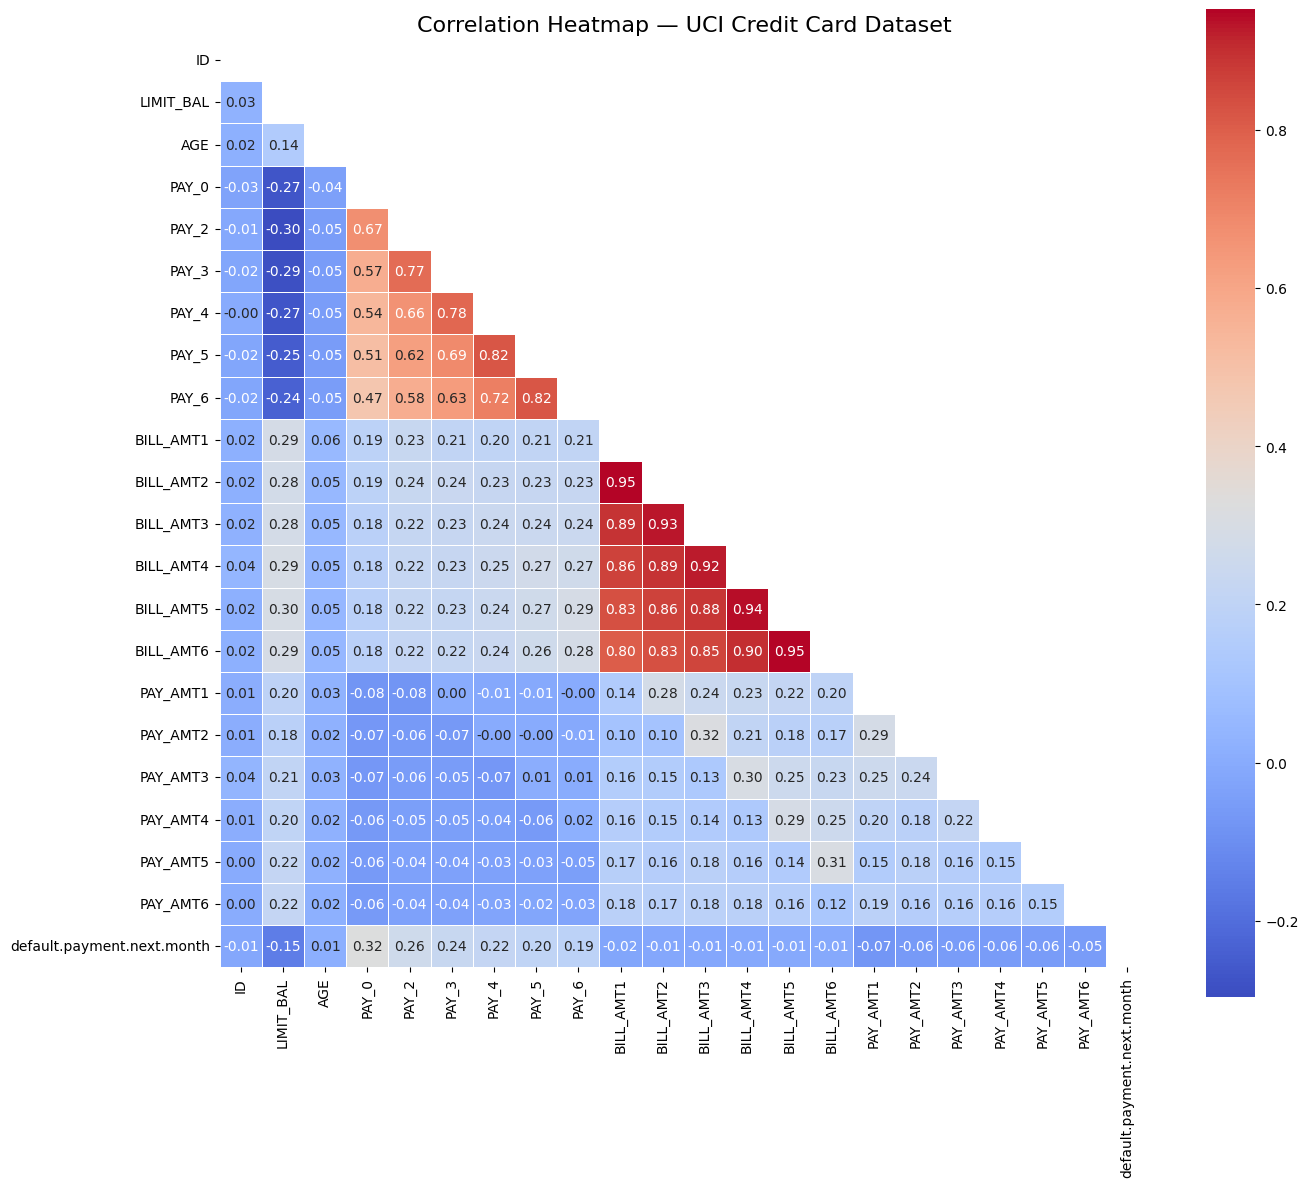

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr = df_visuals.corr(numeric_only=True)

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,        # write correlation values
    fmt=".2f",         # 2 decimal format
    cmap="coolwarm",   # color palette
    linewidths=0.5,    # line between cells
    cbar=True,         # show color bar
    square=True        # squares not rectangles
)

plt.title("Correlation Heatmap — UCI Credit Card Dataset", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Bar Chart**



The bar chart for the `PAY_6` column is crucial for project because it provides the starting point for analysis.

Here is its benefit in a few simple sentences:

The Bar Chart visually represents the **Initial State Distribution** of all credit card clients at a specific time (April 2005). In a Markov Chain model, this distribution acts as the essential **starting vector ($\pi_0$)**. By showing the frequency of each payment status.


the chart also helps you decide how to **simplify model** by merging rare payment statuses into larger, more stable categories. This is necessary to build a reliable and interpretable **Transition Probability Matrix**.

/tmp/ipython-input-1089557319.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_labels, y=payment_counts.values, palette="cubehelix")


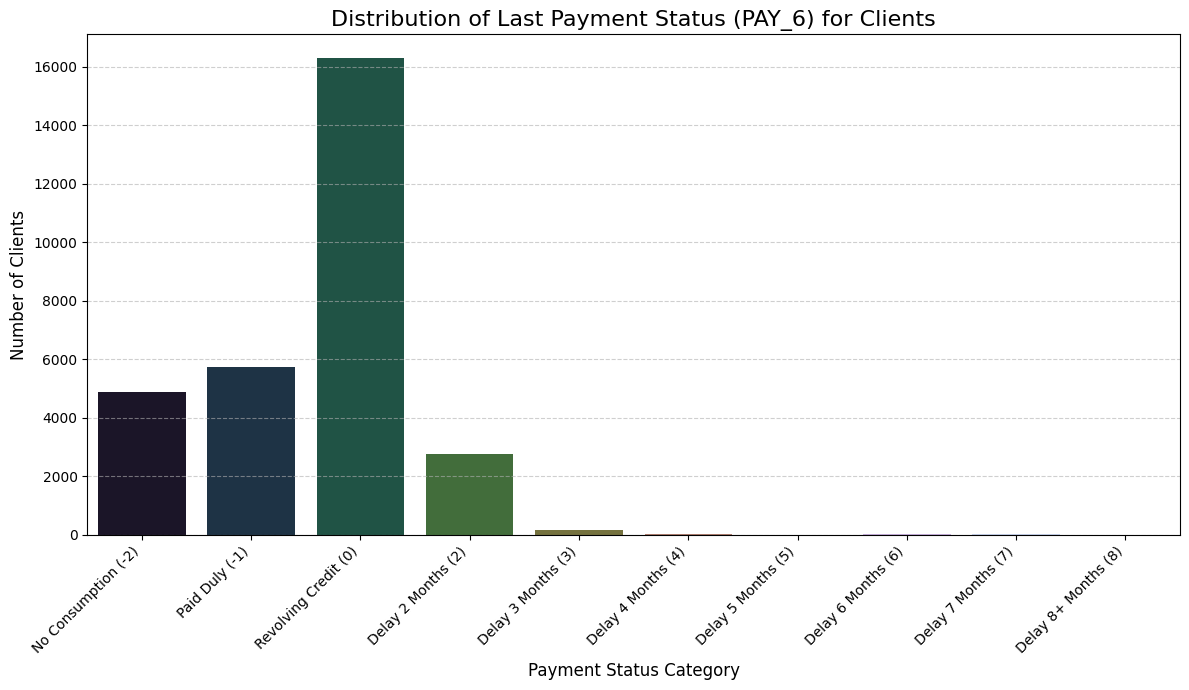

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

payment_status_col = 'PAY_6'
payment_counts = df[payment_status_col].value_counts().sort_index()

# Define clear labels for the payment statuses to appear on the chart
status_mapping = {
    -2: 'No Consumption (-2)',
    -1: 'Paid Duly (-1)',
    0: 'Revolving Credit (0)',
    1: 'Delay 1 Month (1)',
    2: 'Delay 2 Months (2)',
    3: 'Delay 3 Months (3)',
    4: 'Delay 4 Months (4)',
    5: 'Delay 5 Months (5)',
    6: 'Delay 6 Months (6)',
    7: 'Delay 7 Months (7)',
    8: 'Delay 8+ Months (8)',
}

plot_labels = [status_mapping.get(i, f'Undefined Status ({i})') for i in payment_counts.index]

# Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(x=plot_labels, y=payment_counts.values, palette="cubehelix")
plt.title('Distribution of Last Payment Status (PAY_6) for Clients', fontsize=16)
plt.xlabel('Payment Status Category', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###**Pie chart**



The pie chart of the default.payment.next.month column is vital because it reveals the Base Default Rate for the bank's clients.

It shows the exact percentage split between clients who made their payment ("On Time Payment") and those who failed to do so ("Future Default"). This provides the necessary context for stochastic modeling. Your Markov Chain or Hidden Markov Model (HMM) will attempt to predict which clients will fall into the smaller "Future Default" segment, making this chart the direct measure of the problem I am trying to solve.

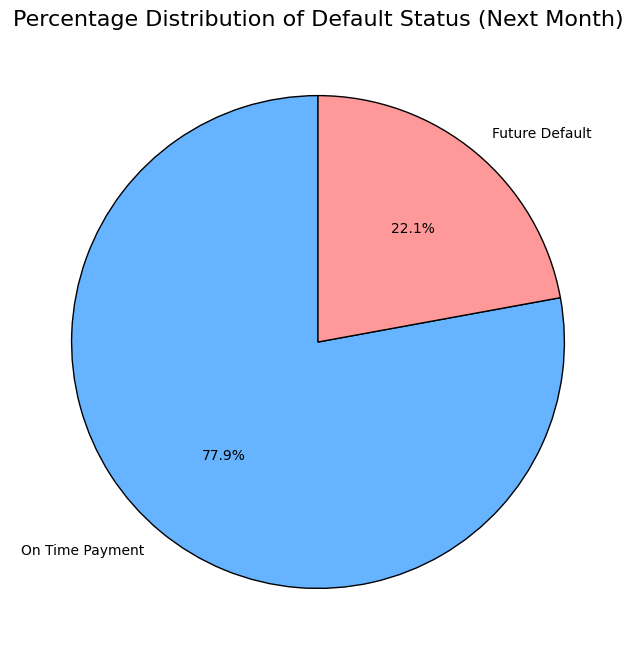

In [ ]:
# The column to be analyzed is the default status for the next month
default_col = 'default.payment.next.month'

default_counts = df[default_col].value_counts()

default_mapping = {
    0: 'On Time Payment',
    1: 'Future Default',
}

pie_labels = [default_mapping[i] for i in default_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(
    default_counts.values,
    labels=pie_labels,
    autopct='%1.1f%%',  # Display the percentage
    startangle=90,      # Vertical start angle
    colors=['#66b3ff', '#ff9999'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Percentage Distribution of Default Status (Next Month)', fontsize=16)
plt.show()

#Monthly Distribution of Repayment Status: A Snapshot of Debt Burden
####This visualization shows how clients’ repayment statuses change across six consecutive months, using the PAY variables from PAY_6 to PAY_0. The distribution makes it clear that most clients consistently pay on time or with minimal delay, while severe delays remain rare. However, the chart also reveals a gradual increase in short and medium delays (1–3 months) as we move toward the most recent month, indicating rising financial pressure over time.

####This pattern is important for the Markov Model because it identifies the dominant repayment behaviors, highlights the transitions between delay levels, and confirms that repayment patterns are not random. The visualization helps validate the data, supports defining meaningful risk states (Low, Medium, High, Default), and provides evidence for how customers move between these states from month to month.

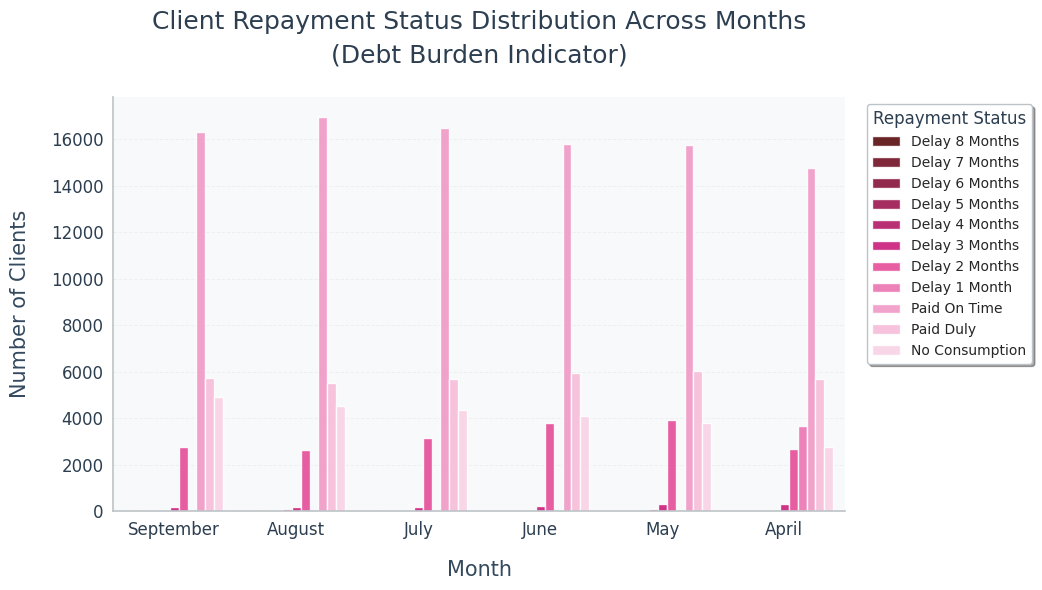

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_status_df = df_visuals[pay_cols].copy()

pay_status_melted = pay_status_df.melt(var_name='Month', value_name='Status')

month_order = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0']
month_labels = ['April', 'May', 'June', 'July', 'August', 'September']

status_map = {
    -2: 'No Consumption',
    -1: 'Paid Duly',
    0: 'Paid On Time',
    1: 'Delay 1 Month',
    2: 'Delay 2 Months',
    3: 'Delay 3 Months',
    4: 'Delay 4 Months',
    5: 'Delay 5 Months',
    6: 'Delay 6 Months',
    7: 'Delay 7 Months',
    8: 'Delay 8 Months',
}
pay_status_melted['Status_Label'] = pay_status_melted['Status'].map(status_map).fillna('Other Delays')

status_order = ['Delay 8 Months', 'Delay 7 Months', 'Delay 6 Months', 'Delay 5 Months',
                'Delay 4 Months', 'Delay 3 Months', 'Delay 2 Months', 'Delay 1 Month',
                'Paid On Time', 'Paid Duly', 'No Consumption', 'Other Delays']

status_order = [s for s in status_order if s in pay_status_melted['Status_Label'].unique()]

pink_palette = {
    'Delay 8 Months': '#660000',
    'Delay 7 Months': '#80001A',
    'Delay 6 Months': '#990033',
    'Delay 5 Months': '#B3004D',
    'Delay 4 Months': '#CC0066',
    'Delay 3 Months': '#E6007E',
    'Delay 2 Months': '#FF3399',
    'Delay 1 Month': '#FF61B3',
    'Paid On Time': '#FF8AC6',
    'Paid Duly': '#FFB3D9',
    'No Consumption': '#FFCCE5',
    'Other Delays': '#FFE6F0'
}

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(
    data=pay_status_melted,
    x='Month',
    hue='Status_Label',
    hue_order=status_order,
    order=pay_cols[::-1],
    palette=pink_palette,
    edgecolor='white',
    linewidth=1,
    alpha=0.9,
    ax=ax
)

ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

plt.title(
    'Client Repayment Status Distribution Across Months\n(Debt Burden Indicator)',
    fontsize=18,
    pad=25,
    color='#2C3E50',
    linespacing=1.5,
)

plt.xlabel(
    'Month',
    fontsize=15,
    labelpad=15,
    color='#34495E'
)

plt.ylabel(
    'Number of Clients',
    fontsize=15,
    labelpad=15,
    color='#34495E'
)

plt.xticks(
    ticks=range(len(month_labels)),
    labels=month_labels[::-1],
    rotation=0,
    fontsize=12,
    color='#2C3E50'
)

plt.yticks(fontsize=12, color='#2C3E50')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#BDC3C7')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_color('#BDC3C7')
ax.spines['bottom'].set_linewidth(1.2)

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7, color='#D5D8DC', axis='y')

legend = plt.legend(
    title='Repayment Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True,
    edgecolor='#BDC3C7',
    facecolor='white'
)
legend.get_title().set_color('#2C3E50')

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()

# Markov Model

## Transition Matrix (Part 1: Low → All States)

Prepare Transition Matrix from Low Risk to next month

In [ ]:
states = ['Low Risk','Medium Risk','High Risk','Default']
transition_matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)
transition_matrix


,Low Risk,Medium Risk,High Risk,Default
Low Risk,0.0,0.0,0.0,0.0
Medium Risk,0.0,0.0,0.0,0.0
High Risk,0.0,0.0,0.0,0.0
Default,0.0,0.0,0.0,0.0


In [ ]:
# Current month = Month_1, Next month = Month_2
current_month = risk_states['Month_1']
next_month = risk_states['Month_2']

In [ ]:
# Filter clients who are currently in Low Risk
low_clients = next_month[current_month == 0]


In [ ]:
# Count the transitions for each state
counts = low_clients.value_counts()


In [ ]:
# Convert counts to probabilities
transition_probabilities = counts / counts.sum()

In [ ]:
# Fill the Low Risk row in the transition matrix
for state_code, prob in transition_probabilities.items():
    transition_matrix.loc['Low Risk', states[state_code]] = prob

Display the results

In [ ]:
print("Transition probabilities from Low Risk → each state (Month_1 → Month_2):\n")
print(transition_probabilities)

Transition probabilities from Low Risk → each state (Month_1 → Month_2):

Month_2
0    0.96798
1    0.03202
Name: count, dtype: float64


In [ ]:
print("\nTransition Matrix (Part 1) - From Low Risk:")
print(transition_matrix)


Transition Matrix (Part 1) - From Low Risk:
             Low Risk  Medium Risk  High Risk  Default
Low Risk      0.96798      0.03202        0.0      0.0
Medium Risk   0.00000      0.00000        0.0      0.0
High Risk     0.00000      0.00000        0.0      0.0
Default       0.00000      0.00000        0.0      0.0


## Transition Matrix (Part 2: Medium & High & Default → All States)

Medium

In [ ]:
state_map = {
    0: 'Low Risk',
    1: 'Medium Risk',
    2: 'High Risk',
    3: 'Default'
}

In [ ]:
#1. Filter customers who are currently at Medium Risk
medium_clients = next_month[current_month == 1]

In [ ]:
# 2. Count the transfers that occurred from them
medium_counts = medium_clients.value_counts()

In [ ]:
# 3. Converting the number to probabilities
medium_probabilities = medium_counts / medium_counts.sum()

In [ ]:
medium_probabilities.index = medium_probabilities.index.map(state_map)

In [ ]:
# 4. Filling the 'Medium' row in the transition matrix
for state_code, prob in medium_probabilities.items():
    transition_matrix.loc['Medium Risk', state_code] = prob

display the *results*

In [ ]:

print("\nTransition probabilities from Medium Risk -> each state (Month_1 -> Month_2):")
transition_matrix


Transition probabilities from Medium Risk -> each state (Month_1 -> Month_2):


,Low Risk,Medium Risk,High Risk,Default
Low Risk,0.967980,0.032020,0.000000,0.0
Medium Risk,0.336226,0.615329,0.048445,0.0
High Risk,0.000000,0.000000,0.000000,0.0
Default,0.000000,0.000000,0.000000,0.0


High

In [ ]:
#1. Filter customers who are currently at High Risk
High_clients = next_month[current_month == 2]

In [ ]:
# 2. Count the transfers that occurred from them
High_counts = High_clients.value_counts()

In [ ]:
# 3. Converting the number to probabilities
High_probabilities = High_counts / High_counts.sum()

In [ ]:
High_probabilities.index = High_probabilities.index.map(state_map)

In [ ]:
# 4. Filling the 'High' row in the transition matrix
for state_code, prob in High_probabilities.items():
    transition_matrix.loc['High Risk', state_code] = prob

display the *results*




In [ ]:
print("\nTransition probabilities from High Risk -> each state (Month_1 -> Month_2):")
transition_matrix


Transition probabilities from High Risk -> each state (Month_1 -> Month_2):


,Low Risk,Medium Risk,High Risk,Default
Low Risk,0.967980,0.032020,0.000000,0.000000
Medium Risk,0.336226,0.615329,0.048445,0.000000
High Risk,0.175966,0.240343,0.532189,0.051502
Default,0.000000,0.000000,0.000000,0.000000


Default

In [ ]:
#1. Filter customers who are currently at Default
Default_clients = next_month[current_month == 3]

In [ ]:
# 2. Count the transfers that occurred from them
Default_counts = Default_clients.value_counts()

In [ ]:
# 3. Converting the number to probabilities
Default_probabilities = Default_counts / Default_counts.sum()

In [ ]:
Default_probabilities.index = Default_probabilities.index.map(state_map)

In [ ]:
# 4. Filling the 'Default' row in the transition matrix
for state_code, prob in Default_probabilities.items():
    transition_matrix.loc['Default', state_code] = prob

display the *results*


In [ ]:
print("\nTransition probabilities from Default Risk -> each state (Month_1 -> Month_2):")
transition_matrix


Transition probabilities from Default Risk -> each state (Month_1 -> Month_2):


,Low Risk,Medium Risk,High Risk,Default
Low Risk,0.967980,0.032020,0.000000,0.000000
Medium Risk,0.336226,0.615329,0.048445,0.000000
High Risk,0.175966,0.240343,0.532189,0.051502
Default,0.025000,0.075000,0.050000,0.850000


## Step Prediction

#### 1) state_map

In [ ]:
state_map = {
    0: 'Low Risk',
    1: 'Medium Risk',
    2: 'High Risk',
    3: 'Default'
}

### 2) transition_matrix

In [ ]:
P = transition_matrix.copy()
P.index = ['Low Risk','Medium Risk','High Risk','Default']
P.columns = ['Low Risk','Medium Risk','High Risk','Default']

### 3) current states

In [ ]:
current_states = risk_states['Month_6'].astype(int)


### 4) Prediction for every client

In [ ]:

rows = []

for s in current_states:
    probs = P.iloc[s].values
    max_index = np.argmax(probs)
    rows.append({
        'current_state_code': s,
        'current_state_name': state_map[s],
        'p_low': probs[0],
        'p_medium': probs[1],
        'p_high': probs[2],
        'p_default': probs[3],
        'predicted_state_code': max_index,
        'predicted_state_name': state_map[max_index],
        'max_probability': probs[max_index]
    })

###  5) Data Frame

In [ ]:
df_predictions = pd.DataFrame(rows)


### 6) Results & top ten rows

In [ ]:
print(df_predictions.head(10))


   current_state_code current_state_name     p_low  p_medium    p_high  \
0                   1        Medium Risk  0.336226  0.615329  0.048445   
1                   0           Low Risk  0.967980  0.032020  0.000000   
2                   0           Low Risk  0.967980  0.032020  0.000000   
3                   0           Low Risk  0.967980  0.032020  0.000000   
4                   0           Low Risk  0.967980  0.032020  0.000000   
5                   0           Low Risk  0.967980  0.032020  0.000000   
6                   0           Low Risk  0.967980  0.032020  0.000000   
7                   0           Low Risk  0.967980  0.032020  0.000000   
8                   0           Low Risk  0.967980  0.032020  0.000000   
9                   0           Low Risk  0.967980  0.032020  0.000000   

   p_default  predicted_state_code predicted_state_name  max_probability  
0        0.0                     1          Medium Risk         0.615329  
1        0.0                     0 

###### The default probability is zero for most customers because they are currently in Low or Medium Risk states, which have no chance of transitioning to Default according to the transition matrix.

In [ ]:
current_states = risk_states['Month_6'].astype(int)
state_counts = current_states.value_counts().sort_index()

for state_code, count in state_counts.items():
    state_name = state_map[state_code]
    print(f"Number of customers in {state_name}: {count}")


Number of customers in Low Risk: 23182
Number of customers in Medium Risk: 6355
Number of customers in High Risk: 398
Number of customers in Default: 65


## **Initial** Probability Distribution , n-step ,steady state , fixed_point

In [ ]:
Initial_Probability_Distribution=[]
mon1=risk_states['Month_1']
intial=mon1.value_counts()
for state ,count in intial.items():
  x=count/mon1.count()
  Initial_Probability_Distribution.append(x)
  print(f"probability of customers in {state_map[state]} : {x} ")

probability of customers in Low Risk : 0.8973666666666666 
probability of customers in Medium Risk : 0.0922 
probability of customers in High Risk : 0.0077666666666666665 
probability of customers in Default : 0.0026666666666666666 


In [ ]:
print(Initial_Probability_Distribution)

[np.float64(0.8973666666666666), np.float64(0.0922), np.float64(0.0077666666666666665), np.float64(0.0026666666666666666)]


In [ ]:
#fixed_point
A=np.eye(4)-transition_matrix.values.T
A[-1]=np.ones(4)
B=np.zeros(4)
B[-1]=1
fixed_point=np.linalg.solve(A,B)
fixed_point

array([0.90668996, 0.08153525, 0.00876526, 0.00300953])

In [ ]:
#Multi_Step
# n-step Transition Probabilities
def n_step_transition(P, n):
  P_n = np.linalg.matrix_power(P.values,n)
  return pd.DataFrame(P_n, index=P.index, columns=P.columns)

In [ ]:
P100= n_step_transition(transition_matrix, 100)
print("100-step transition matrix:")
P100

100-step transition matrix:


,Low Risk,Medium Risk,High Risk,Default
Low Risk,0.90669,0.081535,0.008765,0.00301
Medium Risk,0.90669,0.081535,0.008765,0.00301
High Risk,0.90669,0.081535,0.008765,0.00301
Default,0.90669,0.081535,0.008765,0.00301


In [ ]:
# Example: 200-step transition probabilities--> it has steady state :-)
P200= n_step_transition(transition_matrix, 200)
print("200-step transition matrix:")
P200

200-step transition matrix:


,Low Risk,Medium Risk,High Risk,Default
Low Risk,0.90669,0.081535,0.008765,0.00301
Medium Risk,0.90669,0.081535,0.008765,0.00301
High Risk,0.90669,0.081535,0.008765,0.00301
Default,0.90669,0.081535,0.008765,0.00301


In [ ]:
# second way to cal fixed_point
fix=Initial_Probability_Distribution @  P200
fix

,0
Low Risk,0.906690
Medium Risk,0.081535
High Risk,0.008765
Default,0.003010


In [ ]:
# Suppose we want the probability that a client who starts at 'high' will be at 'default' after 5 months (steps)
P5 = n_step_transition(transition_matrix, 5)
prob_high_to_default = P5.loc['High Risk', 'Default']
print(f"Probability of moving from High Risk → Default in 5 months : {prob_high_to_default:.3f}")

Probability of moving from High Risk → Default in 5 months : 0.068
